In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [3]:
# Load the datasets
file_path = "nfl_data_with_team_stats.csv"
nfl_data = pd.read_csv(file_path)

In [4]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7242 entries, 0 to 7241
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   schedule_date          7242 non-null   object 
 1   schedule_season        7242 non-null   int64  
 2   schedule_week          7242 non-null   object 
 3   schedule_playoff       7242 non-null   bool   
 4   team_home              7242 non-null   object 
 5   score_home             7242 non-null   int64  
 6   score_away             7242 non-null   int64  
 7   team_away              7242 non-null   object 
 8   team_favorite_id       7242 non-null   object 
 9   spread_favorite        7242 non-null   float64
 10  over_under_line        7242 non-null   float64
 11  stadium                7242 non-null   object 
 12  stadium_neutral        7242 non-null   bool   
 13  weather_temperature    6094 non-null   float64
 14  weather_wind_mph       6086 non-null   float64
 15  weat

In [5]:
nfl_data

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,PTS/G_away_defense,OPP PTS_away_defense,PLAYS_away_defense,YDS_away_defense,YDS/PLAY_away_defense,1ST DWN_away_defense,PENALTY_away_defense,P YDS_away_defense,TOP_away_defense,+/- TOV_away_defense
0,1998-09-06,1998,1,False,Baltimore Ravens,13,20,Pittsburgh Steelers,PIT,-3.0,...,18.9,303,1002,4963,5.0,266,106,854,30:46:00,-2
1,1998-09-06,1998,1,False,Carolina Panthers,14,19,Atlanta Falcons,CAR,-4.5,...,18.1,289,949,4739,5.0,267,119,858,27:50:00,19
2,1998-09-06,1998,1,False,Chicago Bears,23,24,Jacksonville Jaguars,JAX,-10.0,...,21.1,338,1057,5558,5.3,313,109,953,31:01:00,10
3,1998-09-06,1998,1,False,Cincinnati Bengals,14,23,Tennessee Oilers,PICK,0.0,...,20.0,320,955,5123,5.4,280,93,704,28:20:00,0
4,1998-09-06,1998,1,False,Dallas Cowboys,38,10,Arizona Cardinals,DAL,-5.5,...,23.6,378,1048,5260,5.0,321,115,956,31:51:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,2025-01-19,2024,Division,True,Buffalo Bills,27,25,Baltimore Ravens,BAL,-1.5,...,20.5,41,104,553,5.3,31,8,51,26:06:00,-3
7238,2025-01-19,2024,Division,True,Philadelphia Eagles,28,22,Los Angeles Rams,PHI,-7.0,...,18.5,37,132,619,4.7,36,5,34,32:36:00,0
7239,2025-01-26,2024,Conference,True,Philadelphia Eagles,55,23,Washington Commanders,PHI,-6.0,...,35.3,106,178,1264,7.1,77,17,125,27:02:00,2
7240,2025-01-26,2024,Conference,True,Kansas City Chiefs,32,29,Buffalo Bills,KC,-1.0,...,21.3,64,162,1008,6.2,64,13,91,25:20:00,4


In [6]:
# Create backtesting windows
n_splits = 5  # Define the number of backtesting splits, 5 means each split cover 4-5 years
tscv = TimeSeriesSplit(n_splits=n_splits)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

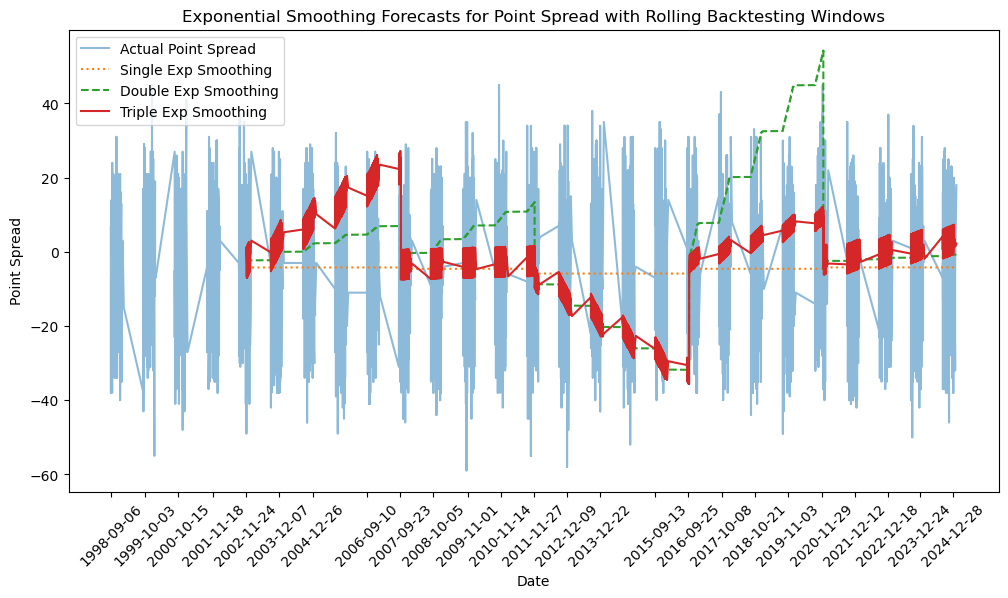

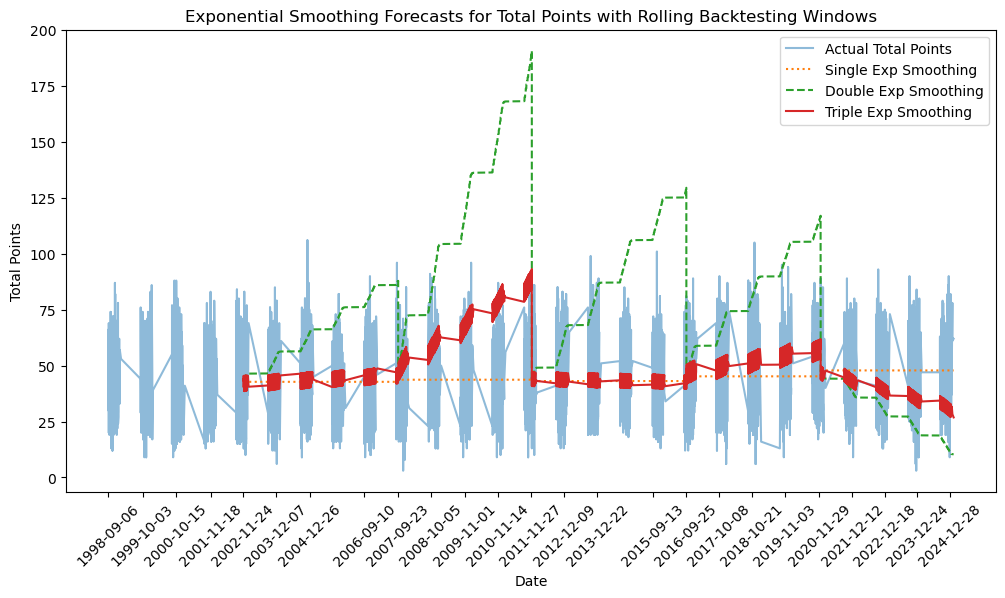

Average RMSE for actual_spread: {'single': 191.0629274298566, 'double': 538.1885282094818, 'triple': 334.367587070543}
Average MAE for actual_spread: {'single': 10.655742772033708, 'double': 17.74016718085621, 'triple': 14.386705749535725}
Average MAPE for actual_spread: {'single': inf, 'double': inf, 'triple': inf}
Average RMSE for actual_total_points: {'single': 198.4190932701541, 'double': 2674.140127753152, 'triple': 362.25248069238785}
Average MAE for actual_total_points: {'single': 11.147553627326634, 'double': 40.057507223861094, 'triple': 14.720550450770597}
Average MAPE for actual_total_points: {'single': 31.095322108586895, 'double': 109.21700720932806, 'triple': 41.53089552135257}


/var/folders/hj/_jmscth928bcdm9fr013zqzr0000gn/T/ipykernel_22486/1448502983.py:43: RuntimeWarning: divide by zero encountered in divide
  metrics = {"rmse": mean_squared_error, "mae": mean_absolute_error, "mape": lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100}


In [19]:
# Adjust seasonal period based on NFL season length
seasonal_period = 16  # Approximate number of games in an NFL season

# Apply ETS over rolling forecast approach for both point spread and total points
for target in ["actual_spread", "actual_total_points"]:
    nfl_data[f"{target}_single_exp"] = None
    nfl_data[f"{target}_double_exp"] = None
    nfl_data[f"{target}_triple_exp"] = None
    
    for train_index, test_index in tscv.split(nfl_data):
        train, test = nfl_data.iloc[train_index], nfl_data.iloc[test_index]
        
        # Apply Single, Double, and Triple Exponential Smoothing
        model_single = SimpleExpSmoothing(train[target]).fit()
        model_double = ExponentialSmoothing(train[target], trend='add').fit()
        model_triple = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=seasonal_period).fit()
        
        nfl_data.loc[test.index, f"{target}_single_exp"] = model_single.forecast(len(test)).values
        nfl_data.loc[test.index, f"{target}_double_exp"] = model_double.forecast(len(test)).values
        nfl_data.loc[test.index, f"{target}_triple_exp"] = model_triple.forecast(len(test)).values

# Convert forecast columns to numeric type
for target in ["actual_spread", "actual_total_points"]:
    for method in ["single_exp", "double_exp", "triple_exp"]:
        nfl_data[f"{target}_{method}"] = pd.to_numeric(nfl_data[f"{target}_{method}"], errors="coerce")

# Plot ETS results as continuous forecast lines for both point spread and total points
for target, label in zip(["actual_spread", "actual_total_points"], ["Point Spread", "Total Points"]):
    plt.figure(figsize=(12, 6))
    plt.plot(nfl_data["schedule_date"], nfl_data[target], label=f"Actual {label}", alpha=0.5)
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_single_exp"], label="Single Exp Smoothing", linestyle='dotted')
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_double_exp"], label="Double Exp Smoothing", linestyle='dashed')
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_triple_exp"], label="Triple Exp Smoothing", linestyle='solid')
    
    plt.xlabel("Date")
    plt.ylabel(label)
    plt.xticks(nfl_data["schedule_date"][::300], rotation=45)  # Show every 100th date
    plt.title(f"Exponential Smoothing Forecasts for {label} with Rolling Backtesting Windows")
    plt.legend()
    plt.show()

# Compute RMSE, MAE, and MAPE for both point spread and total points
metrics = {"rmse": mean_squared_error, "mae": mean_absolute_error, "mape": lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100}
for target in ["actual_spread", "actual_total_points"]:
    for metric_name, metric_func in metrics.items():
        scores = {"single": [], "double": [], "triple": []}
        
        for train_index, test_index in tscv.split(nfl_data):
            test = nfl_data.iloc[test_index]
            for method in ["single_exp", "double_exp", "triple_exp"]:
                scores[method.split('_')[0]].append(metric_func(test[target].values, test[f"{target}_{method}"].values))
        
        print(f"Average {metric_name.upper()} for {target}:", {key: np.mean(values) for key, values in scores.items()})

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

Average RMSE for spread_error: {'single': 176.67045995311415, 'double': 287.09088006625814, 'triple': 245.51671027546004}
Average MAE for spread_error: {'single': 10.313980916175222, 'double': 13.401192825261308, 'triple': 12.264781280679964}
Average MAPE for spread_error: {'single': inf, 'double': inf, 'triple': inf}
Average RMSE for total_points_error: {'single': 179.38208256578383, 'double': 1672.6734126355354, 'triple': 387.76776926256707}
Average MAE for total_points_error: {'single': 10.599756524082741, 'double': 31.102906382673673, 'triple': 15.256881059799316}
Average MAPE for total_points_error: {'single': inf, 'double': inf, 'triple': inf}
Average RMSE for underdog_won: {'single': 0.22370804755800822, 'double': 0.22430219220691944, 'triple': 0.22513303696389375}
Average MAE for underdog_won: {'single': 0.4551034355096057, 'double': 0.4531818851047896, 'triple': 0.4527208800223269}
Average MAPE for underdog_won: {'single': inf, 'double': inf, 'triple': inf}
Average RMSE for ov

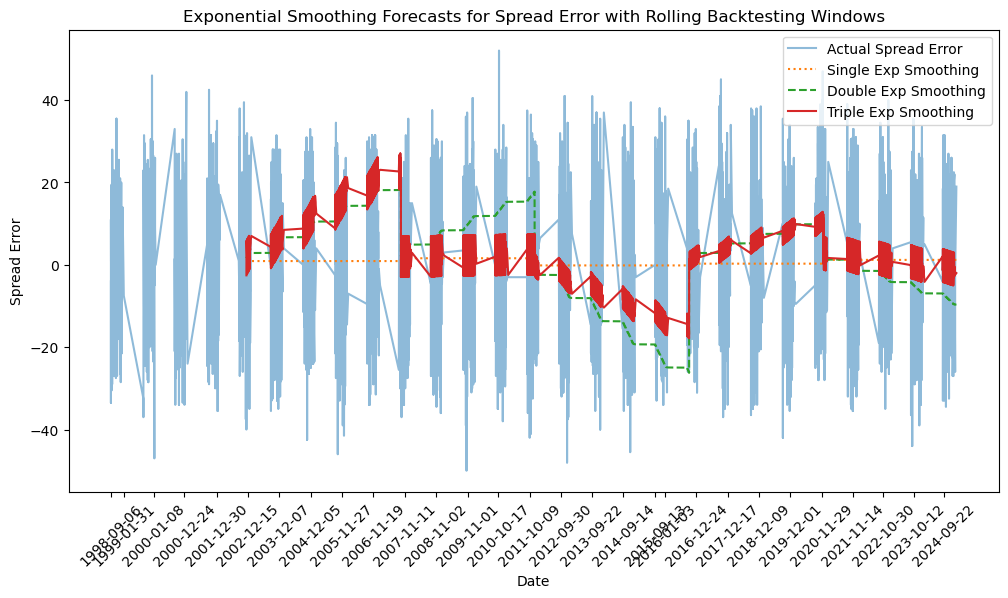

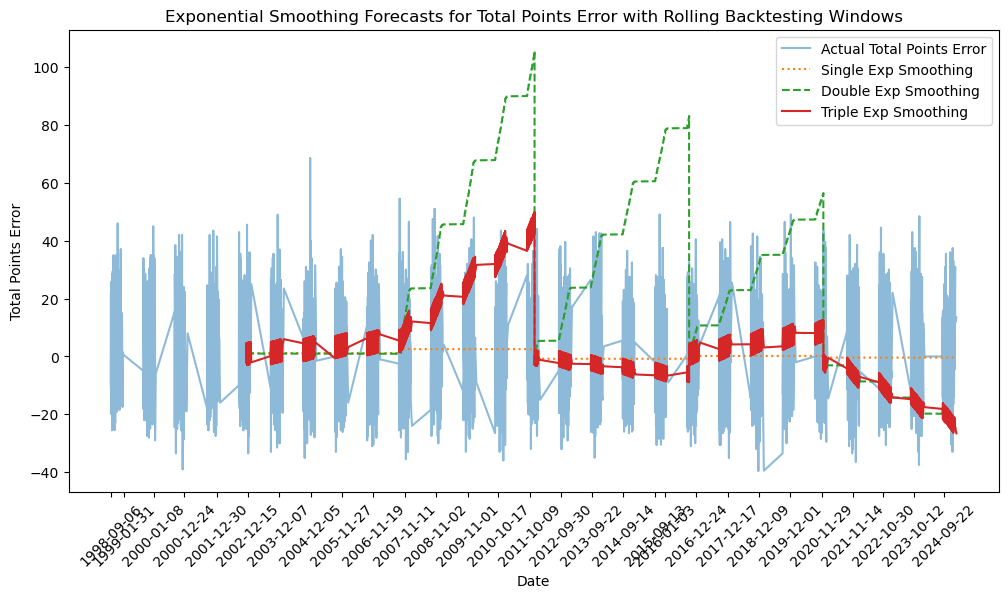

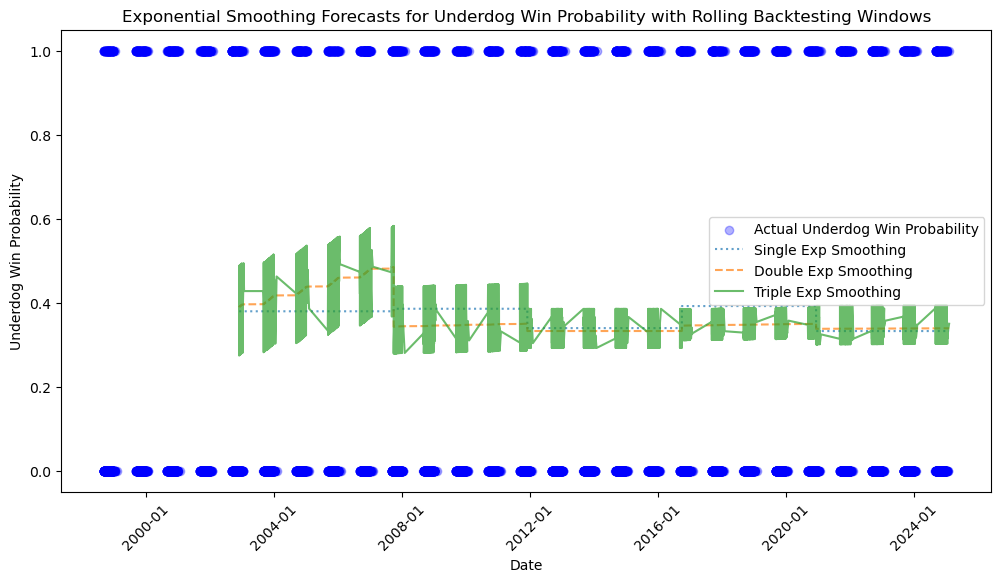

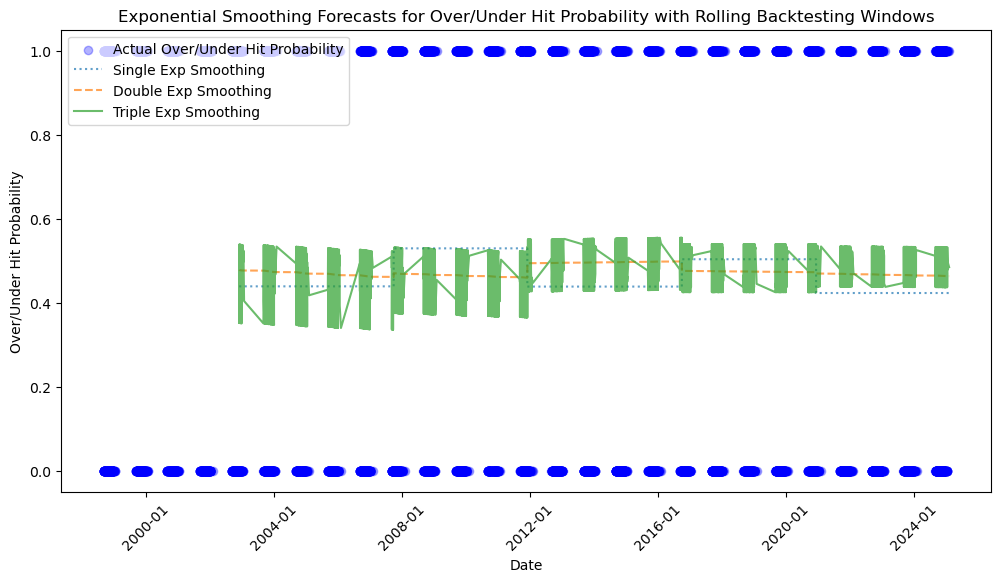

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure `schedule_date` is in datetime format
nfl_data["schedule_date"] = pd.to_datetime(nfl_data["schedule_date"])

# Sort values by date to avoid misalignment issues
nfl_data = nfl_data.sort_values("schedule_date")

# Define targets for forecasting
targets = ["spread_error", "total_points_error", "underdog_won", "over_hit"]
seasonal_period = 16  # Approximate NFL season length

# Apply ETS models over rolling forecast approach
for target in targets:
    nfl_data[f"{target}_single_exp"] = None
    nfl_data[f"{target}_double_exp"] = None
    nfl_data[f"{target}_triple_exp"] = None
    
    for train_index, test_index in tscv.split(nfl_data):
        train, test = nfl_data.iloc[train_index], nfl_data.iloc[test_index]
        
        # Apply Single, Double, and Triple Exponential Smoothing
        model_single = SimpleExpSmoothing(train[target]).fit()
        model_double = ExponentialSmoothing(train[target], trend='add').fit()
        model_triple = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=seasonal_period).fit()
        
        nfl_data.loc[test.index, f"{target}_single_exp"] = model_single.forecast(len(test)).values
        nfl_data.loc[test.index, f"{target}_double_exp"] = model_double.forecast(len(test)).values
        nfl_data.loc[test.index, f"{target}_triple_exp"] = model_triple.forecast(len(test)).values

# Convert forecast columns to numeric type
for target in targets:
    for method in ["single_exp", "double_exp", "triple_exp"]:
        nfl_data[f"{target}_{method}"] = pd.to_numeric(nfl_data[f"{target}_{method}"], errors="coerce")

# Compute RMSE, MAE, and MAPE for error predictions
metrics = {
    "rmse": mean_squared_error,
    "mae": mean_absolute_error,
    "mape": lambda y, y_pred: np.mean(np.abs((y - y_pred) / y)) * 100
}
for target in targets:
    for metric_name, metric_func in metrics.items():
        scores = {"single": [], "double": [], "triple": []}
        
        for train_index, test_index in tscv.split(nfl_data):
            test = nfl_data.iloc[test_index]
            for method in ["single_exp", "double_exp", "triple_exp"]:
                scores[method.split('_')[0]].append(
                    metric_func(test[target].values, test[f"{target}_{method}"].values)
                )
        
        print(f"Average {metric_name.upper()} for {target}:", {key: np.mean(values) for key, values in scores.items()})

# Plot ETS forecast results
for target, label in zip(
    ["spread_error", "total_points_error"],
    ["Spread Error", "Total Points Error"]
):
    plt.figure(figsize=(12, 6))
    plt.plot(nfl_data["schedule_date"], nfl_data[target], label=f"Actual {label}", alpha=0.5)
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_single_exp"], label="Single Exp Smoothing", linestyle='dotted')
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_double_exp"], label="Double Exp Smoothing", linestyle='dashed')
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_triple_exp"], label="Triple Exp Smoothing", linestyle='solid')
    
    plt.xlabel("Date")
    plt.ylabel(label)
    plt.xticks(nfl_data["schedule_date"][::250], rotation=45)  # Show every 200th date
    plt.title(f"Exponential Smoothing Forecasts for {label} with Rolling Backtesting Windows")
    plt.legend()
    plt.show()

# New Visualization for Binary Variables (Scatter for Actual, Line for Forecasts)
for target, label in zip(
    ["underdog_won", "over_hit"],
    ["Underdog Win Probability", "Over/Under Hit Probability"]
):
    plt.figure(figsize=(12, 6))

    # Scatter plot for actual binary values
    plt.scatter(nfl_data["schedule_date"], nfl_data[target], color='blue', alpha=0.3, label=f"Actual {label}")

    # Line plots for smoothing forecasts
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_single_exp"], linestyle='dotted', label="Single Exp Smoothing", alpha=0.7)
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_double_exp"], linestyle='dashed', label="Double Exp Smoothing", alpha=0.7)
    plt.plot(nfl_data["schedule_date"], nfl_data[f"{target}_triple_exp"], linestyle='solid', label="Triple Exp Smoothing", alpha=0.7)

    # Formatting for better readability
    plt.xlabel("Date")
    plt.ylabel(label)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.title(f"Exponential Smoothing Forecasts for {label} with Rolling Backtesting Windows")
    plt.legend()
    plt.show()


In [37]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Test Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    if result[1] < 0.05:
        print("The series is stationary (No differencing needed).")
    else:
        print("The series is NOT stationary (Differencing needed).")

# Check stationarity of spread_error
check_stationarity(nfl_data["actual_spread"])
check_stationarity(nfl_data["actual_total_points"])
check_stationarity(nfl_data["spread_error"])
check_stationarity(nfl_data["total_points_error"])

ADF Test Statistic: -85.28160809603479
P-Value: 0.0
The series is stationary (No differencing needed).
ADF Test Statistic: -17.588544548753905
P-Value: 3.974576141509721e-30
The series is stationary (No differencing needed).
ADF Test Statistic: -85.55617720902072
P-Value: 0.0
The series is stationary (No differencing needed).
ADF Test Statistic: -85.14606685681588
P-Value: 0.0
The series is stationary (No differencing needed).


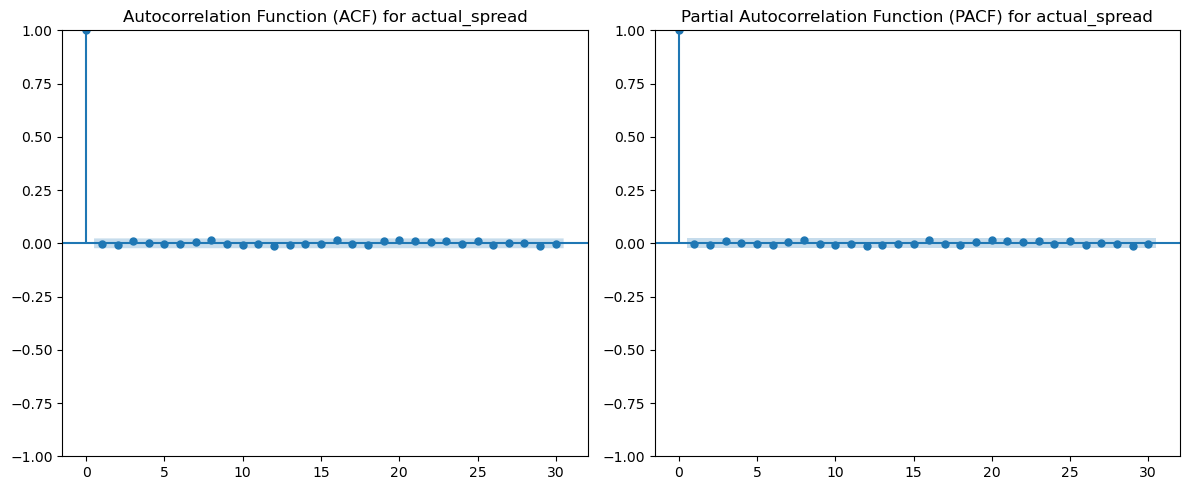

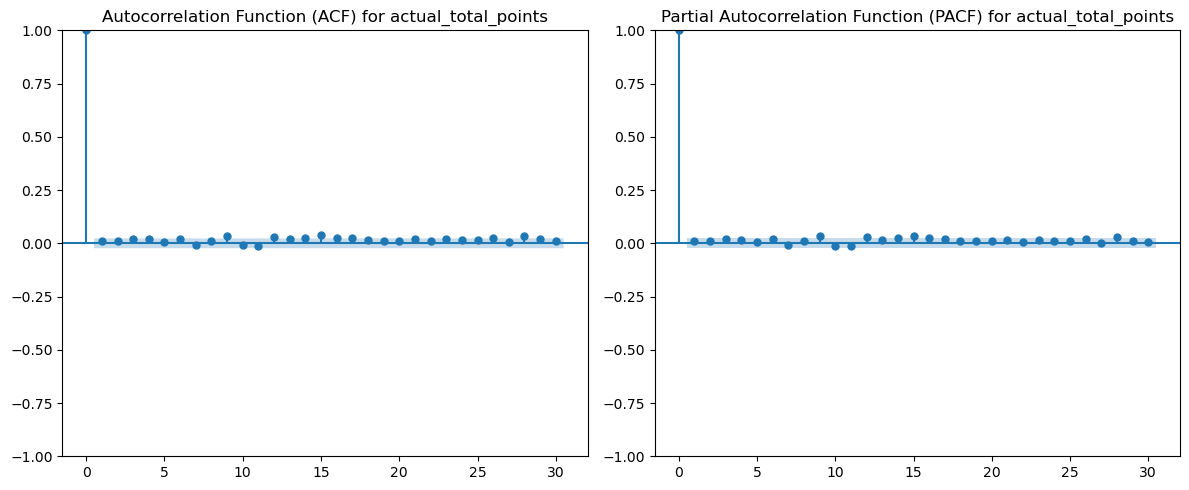

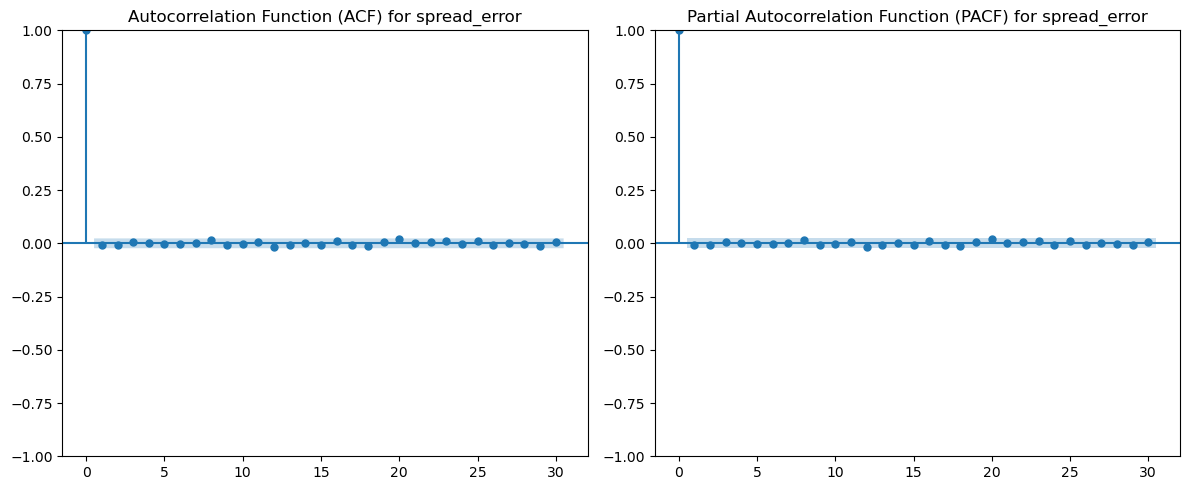

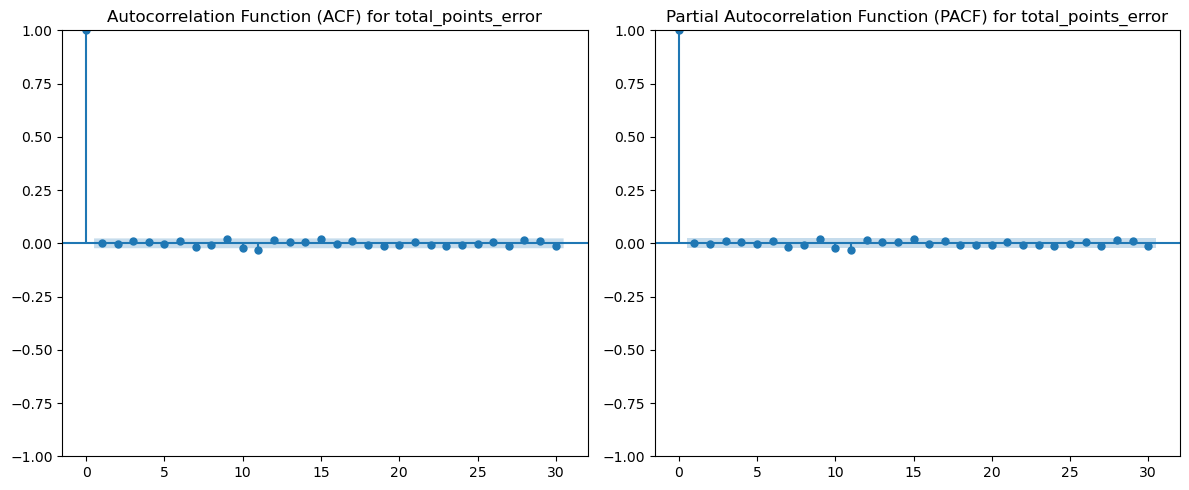

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the variables to analyze
variables = ["actual_spread", "actual_total_points", "spread_error", "total_points_error"]

# Loop through each variable and create separate ACF & PACF plots
for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ACF Plot (Find q)
    sm.graphics.tsa.plot_acf(nfl_data[var].dropna(), lags=30, ax=axes[0])
    axes[0].set_title(f"Autocorrelation Function (ACF) for {var}")

    # PACF Plot (Find p)
    sm.graphics.tsa.plot_pacf(nfl_data[var].dropna(), lags=30, ax=axes[1])
    axes[1].set_title(f"Partial Autocorrelation Function (PACF) for {var}")

    # Show plot
    plt.tight_layout()
    plt.show()


Finding optimal ARIMA order for actual_spread using last 1400 records...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11430.224, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11419.124, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11422.441, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11380.232, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=11378.949, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=11368.407, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=11353.114, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=11239.599, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=11238.372, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=11236.387, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] interce

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

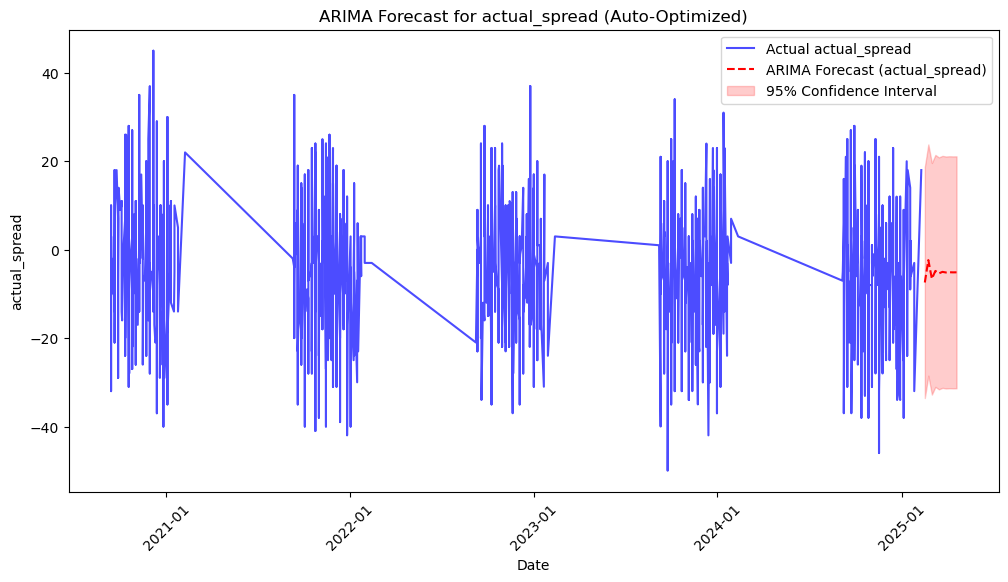

ARIMA Model Summary for actual_spread:
                               SARIMAX Results                                
Dep. Variable:          actual_spread   No. Observations:                 1400
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -5613.193
Date:                Tue, 18 Feb 2025   AIC                          11236.387
Time:                        11:43:44   BIC                          11262.608
Sample:                             0   HQIC                         11246.189
                               - 1400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1254      0.349    -14.705      0.000      -5.809      -4.442
ar.L1         -0.0315      0.026     -1.197      0.231      -0.083       0.020
ar.L2        

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

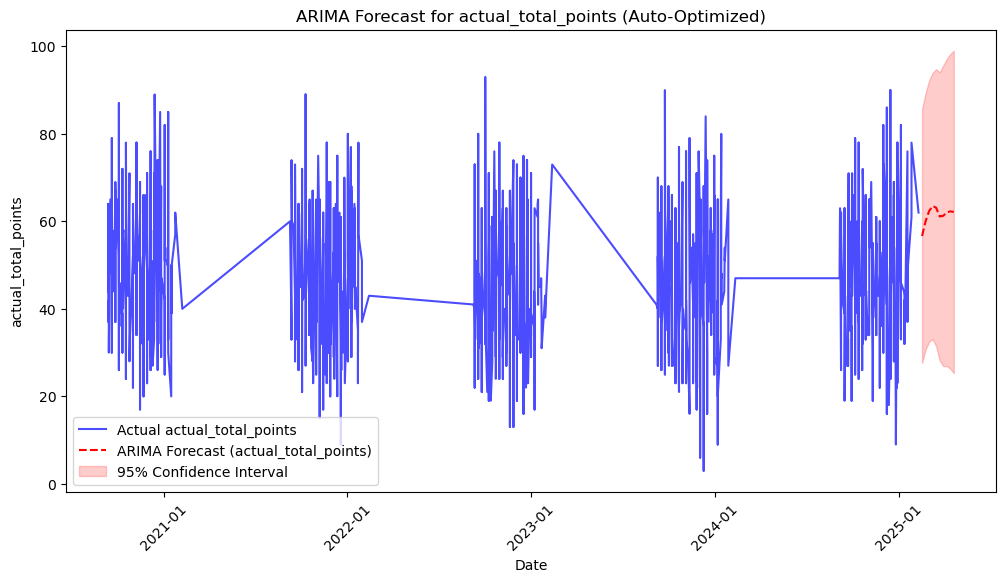

ARIMA Model Summary for actual_total_points:
                                SARIMAX Results                                
Dep. Variable:     actual_total_points   No. Observations:                 1400
Model:                  ARIMA(5, 1, 0)   Log Likelihood               -5755.750
Date:                 Tue, 18 Feb 2025   AIC                          11523.501
Time:                         11:43:48   BIC                          11554.962
Sample:                              0   HQIC                         11535.262
                                - 1400                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.026    -32.498      0.000      -0.907      -0.804
ar.L2         -0.6879      0.035    -19.844      0.000      -0.756      -0.620

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

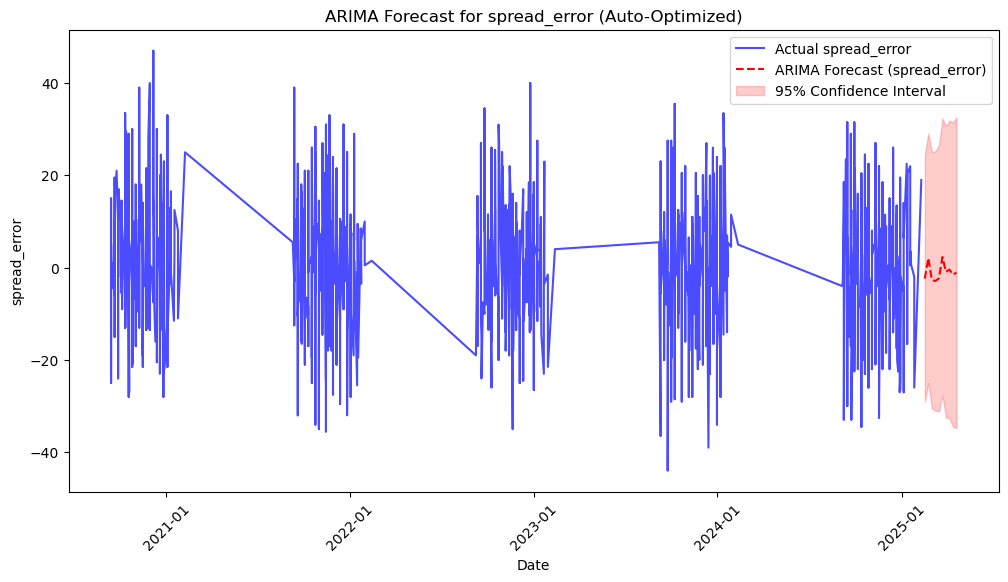

ARIMA Model Summary for spread_error:
                               SARIMAX Results                                
Dep. Variable:           spread_error   No. Observations:                 1400
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5643.705
Date:                Tue, 18 Feb 2025   AIC                          11299.411
Time:                        11:43:55   BIC                          11330.872
Sample:                             0   HQIC                         11311.172
                               - 1400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8620      0.027    -32.384      0.000      -0.914      -0.810
ar.L2         -0.6401      0.034    -19.042      0.000      -0.706      -0.574
ar.L3         

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

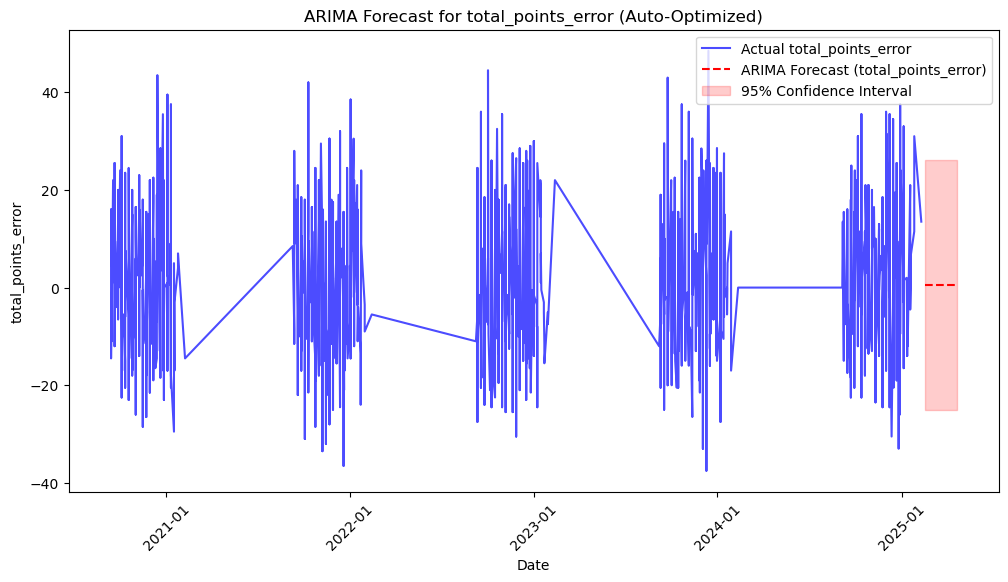

ARIMA Model Summary for total_points_error:
                               SARIMAX Results                                
Dep. Variable:     total_points_error   No. Observations:                 1400
Model:                          ARIMA   Log Likelihood               -5582.040
Date:                Tue, 18 Feb 2025   AIC                          11168.079
Time:                        11:43:57   BIC                          11178.568
Sample:                             0   HQIC                         11172.000
                               - 1400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5550      0.359      1.545      0.122      -0.149       1.259
sigma2       170.1143      6.267     27.144      0.000     157.831     182.398
Ljung-Bo

In [42]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def apply_auto_arima(target, forecast_steps=10, train_window=None):
    """
    Uses auto_arima to find the best (p,d,q), fits an ARIMA model, and forecasts future values.
    
    Parameters:
    - target: str, name of the target variable (e.g., "actual_spread", "spread_error").
    - forecast_steps: int, number of future steps to forecast.
    - train_window: int, number of past data points to use (None for all data).
    """
    # Ensure `schedule_date` is in datetime format
    nfl_data["schedule_date"] = pd.to_datetime(nfl_data["schedule_date"])

    # Drop missing values
    df = nfl_data.dropna(subset=[target]).copy()

    # Sort by date
    df = df.sort_values("schedule_date")

    # Apply training window (if specified)
    if train_window:
        df = df.tail(train_window)  # Keep only the most recent `train_window` records

    # Use auto_arima to find the best (p,d,q)
    print(f"Finding optimal ARIMA order for {target} using last {train_window or 'ALL'} records...")
    auto_model = auto_arima(df[target], seasonal=False, trace=True, suppress_warnings=True)
    best_order = auto_model.order
    print(f"Optimal ARIMA Order for {target}: {best_order}\n")

    # Fit ARIMA model using best order
    model = ARIMA(df[target], order=best_order)
    fitted_model = model.fit()

    # Forecast future values
    forecast_object = fitted_model.get_forecast(steps=forecast_steps)
    forecast = forecast_object.predicted_mean
    conf_int = forecast_object.conf_int()

    # Create future dates dynamically
    last_date = df["schedule_date"].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='W')[1:]

    # Plot actual values + forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df["schedule_date"], df[target], label=f"Actual {target}", alpha=0.7, color="blue")

    # Forecast line
    plt.plot(future_dates, forecast, label=f"ARIMA Forecast ({target})", linestyle='dashed', color='red')

    # Confidence Interval
    plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="95% Confidence Interval")

    # X-Axis Formatting
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.title(f"ARIMA Forecast for {target} (Auto-Optimized)")
    plt.legend()

    # Improve x-axis readability
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show every year
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    plt.show()

    # Print model summary
    print(f"ARIMA Model Summary for {target}:")
    print(fitted_model.summary())

# Apply Auto-ARIMA with adjustable past data usage
for target in ["actual_spread", "actual_total_points", "spread_error", "total_points_error"]:
    apply_auto_arima(target, train_window=1400)  # Adjust to use the last 500 records



🔄 Backtest 1: Training on 2020-01-01 to 2020-12-31, Forecasting 2021-01-01 to 2021-12-31
Best ARIMA Order for Backtest 1: (1, 0, 1)
🔹 RMSE: 14.6025, MAE: 11.4101


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

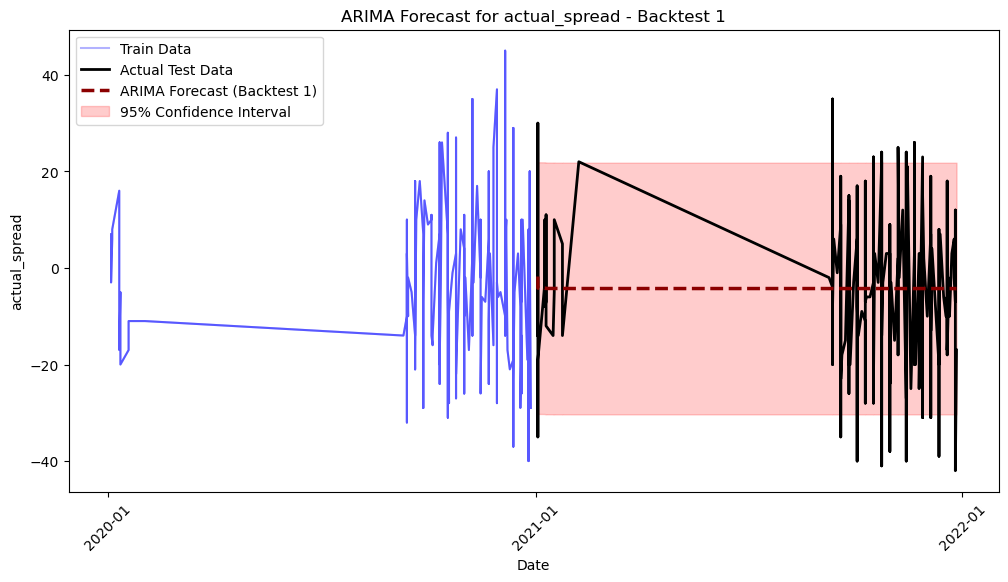


🔄 Backtest 2: Training on 2020-01-01 to 2021-12-31, Forecasting 2022-01-01 to 2022-12-31
Best ARIMA Order for Backtest 2: (1, 0, 0)
🔹 RMSE: 11.8263, MAE: 9.0084


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

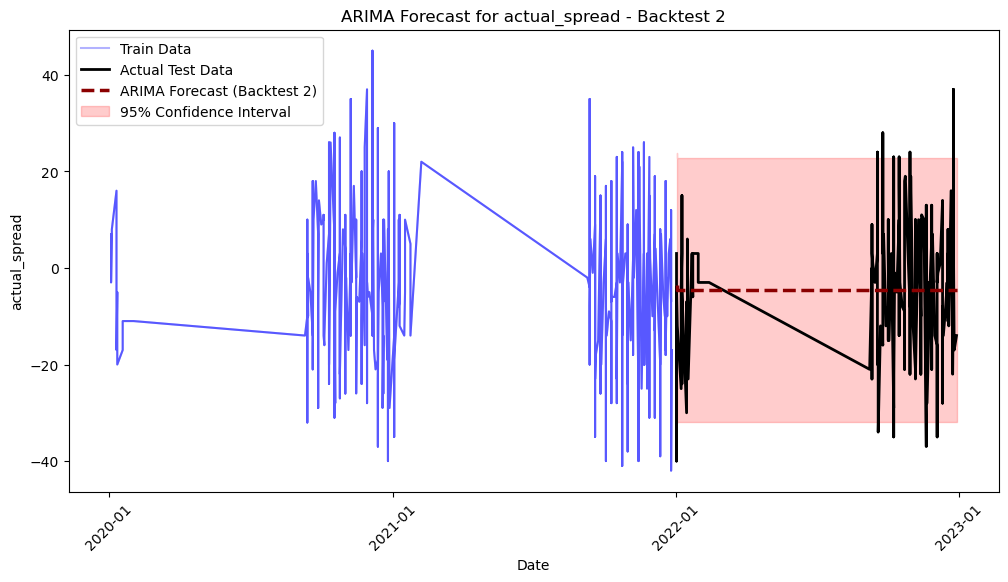


🔄 Backtest 3: Training on 2020-01-01 to 2022-12-31, Forecasting 2023-01-01 to 2023-12-31
Best ARIMA Order for Backtest 3: (0, 0, 0)
🔹 RMSE: 13.5627, MAE: 10.3397


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

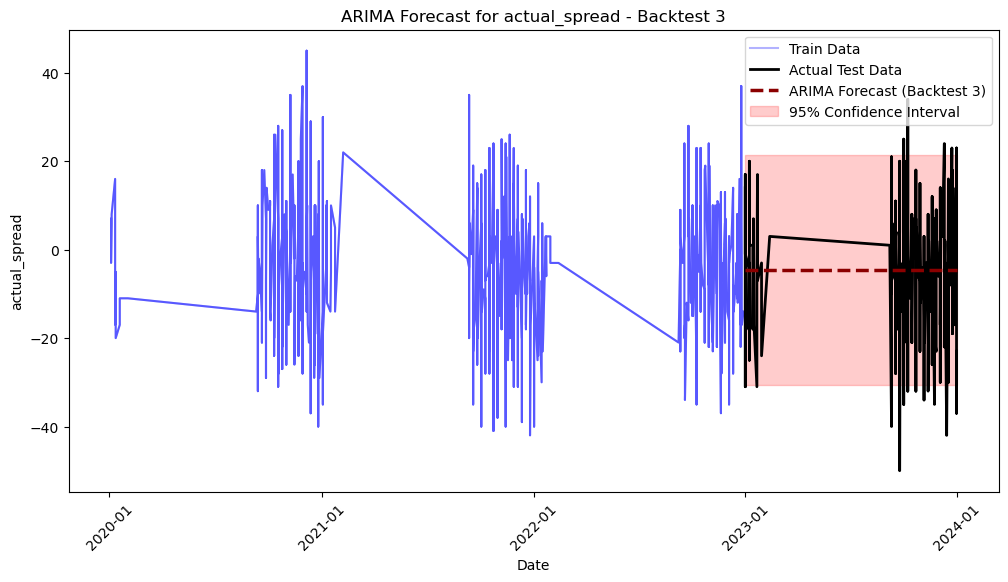


🔄 Backtest 4: Training on 2020-01-01 to 2023-12-31, Forecasting 2024-01-01 to 2024-12-31
Best ARIMA Order for Backtest 4: (3, 0, 0)
🔹 RMSE: 13.2910, MAE: 9.8741


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

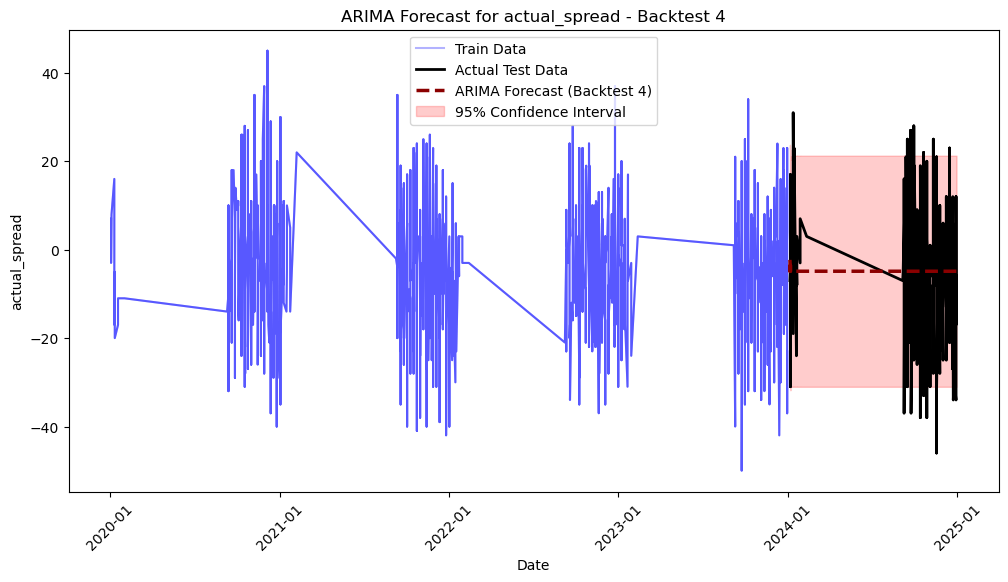


📊 Average RMSE for actual_spread: 13.3206
📊 Average MAE for actual_spread: 10.1580

🔄 Backtest 1: Training on 2020-01-01 to 2020-12-31, Forecasting 2021-01-01 to 2021-12-31
Best ARIMA Order for Backtest 1: (0, 0, 0)
🔹 RMSE: 14.3616, MAE: 11.6987


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

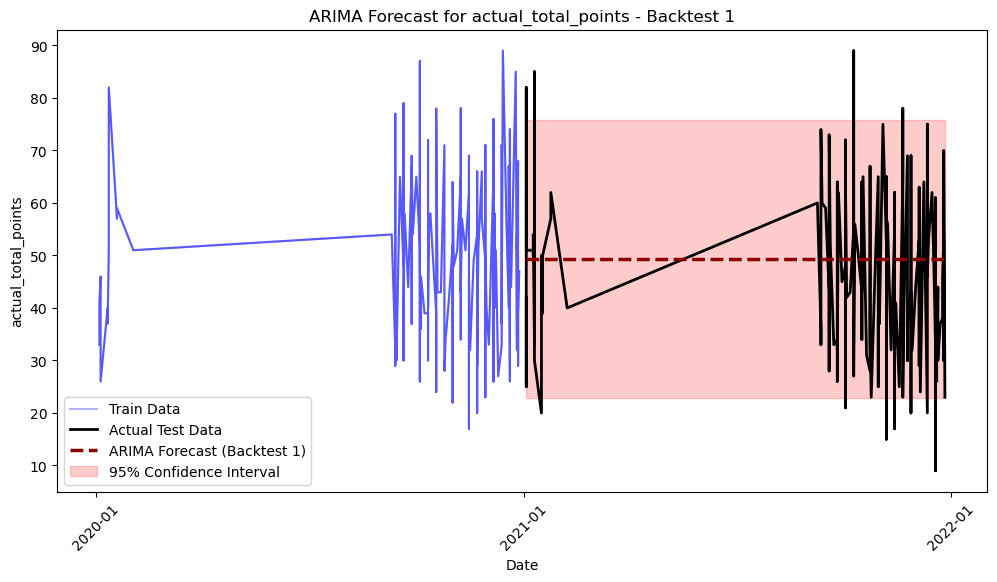


🔄 Backtest 2: Training on 2020-01-01 to 2021-12-31, Forecasting 2022-01-01 to 2022-12-31
Best ARIMA Order for Backtest 2: (2, 1, 1)
🔹 RMSE: 14.0213, MAE: 11.1905


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

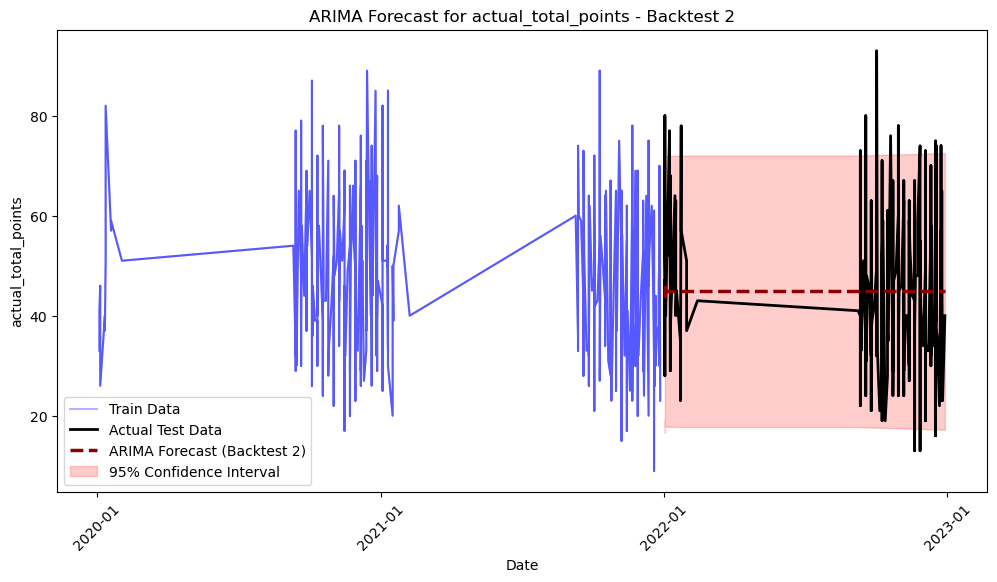


🔄 Backtest 3: Training on 2020-01-01 to 2022-12-31, Forecasting 2023-01-01 to 2023-12-31
Best ARIMA Order for Backtest 3: (1, 1, 2)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


🔹 RMSE: 13.5429, MAE: 10.6854


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


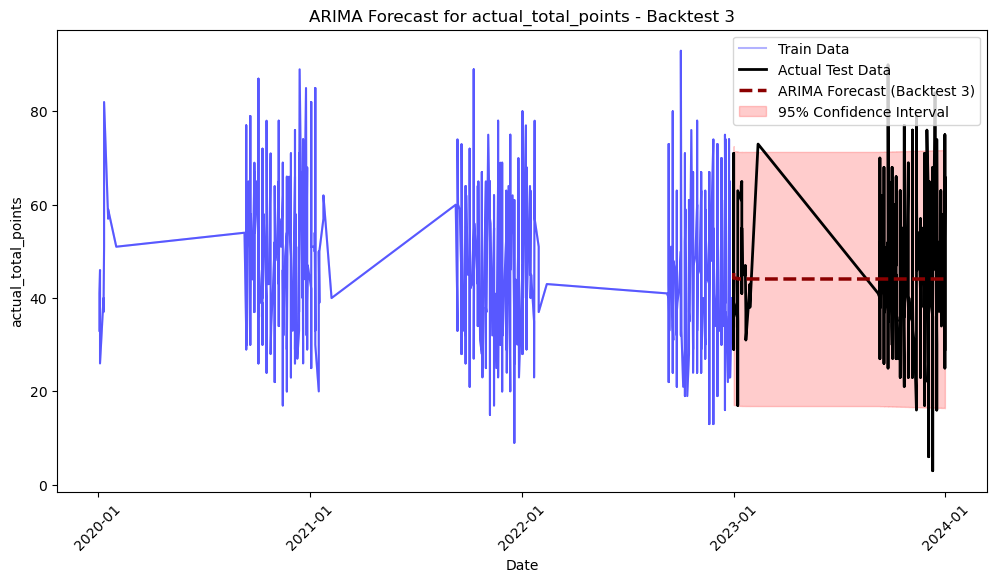


🔄 Backtest 4: Training on 2020-01-01 to 2023-12-31, Forecasting 2024-01-01 to 2024-12-31
Best ARIMA Order for Backtest 4: (5, 1, 0)
🔹 RMSE: 14.6340, MAE: 11.3948


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

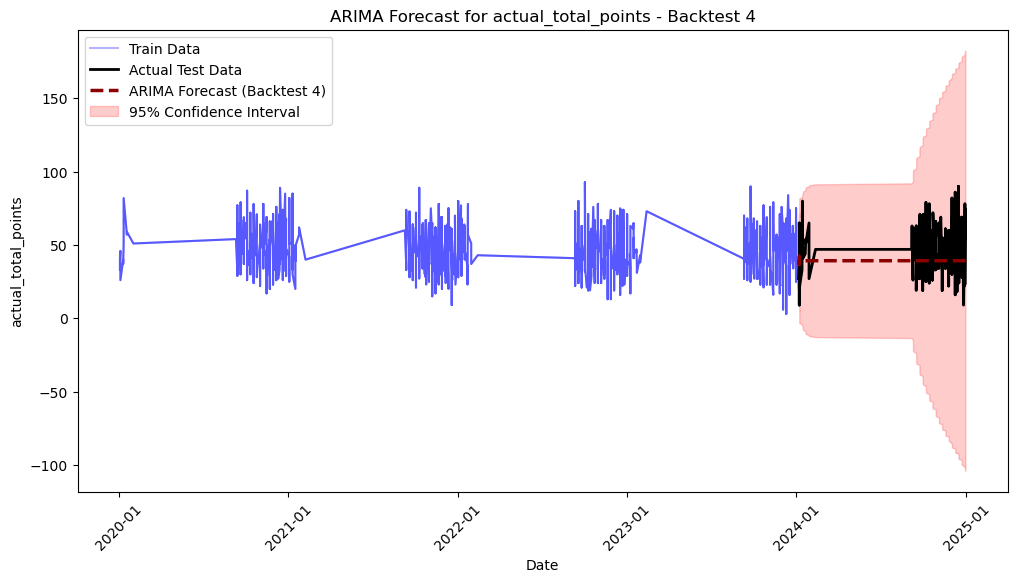


📊 Average RMSE for actual_total_points: 14.1399
📊 Average MAE for actual_total_points: 11.2423

🔄 Backtest 1: Training on 2020-01-01 to 2020-12-31, Forecasting 2021-01-01 to 2021-12-31
Best ARIMA Order for Backtest 1: (1, 0, 1)
🔹 RMSE: 13.6377, MAE: 10.6507


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

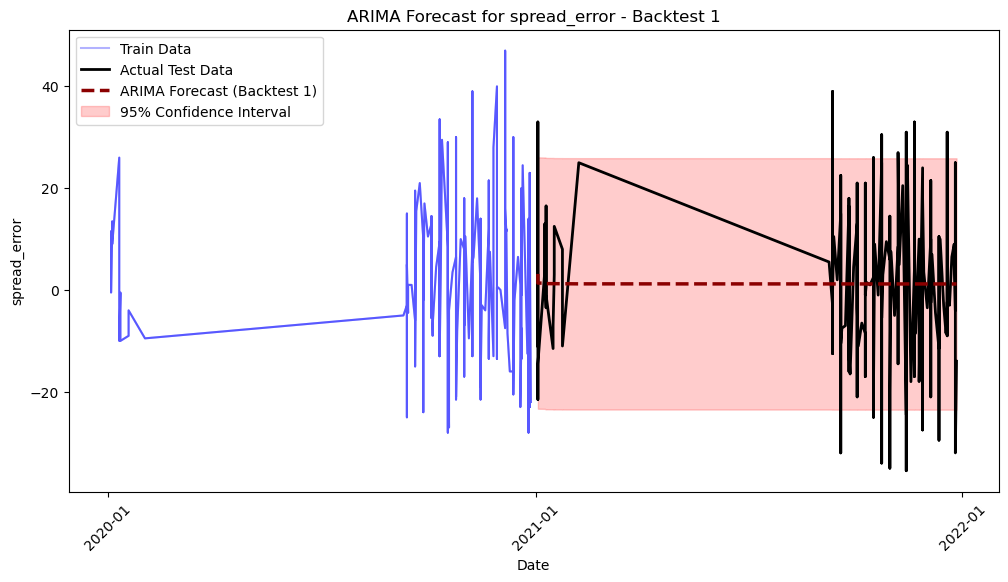


🔄 Backtest 2: Training on 2020-01-01 to 2021-12-31, Forecasting 2022-01-01 to 2022-12-31
Best ARIMA Order for Backtest 2: (2, 0, 2)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

🔹 RMSE: 11.4644, MAE: 8.7378


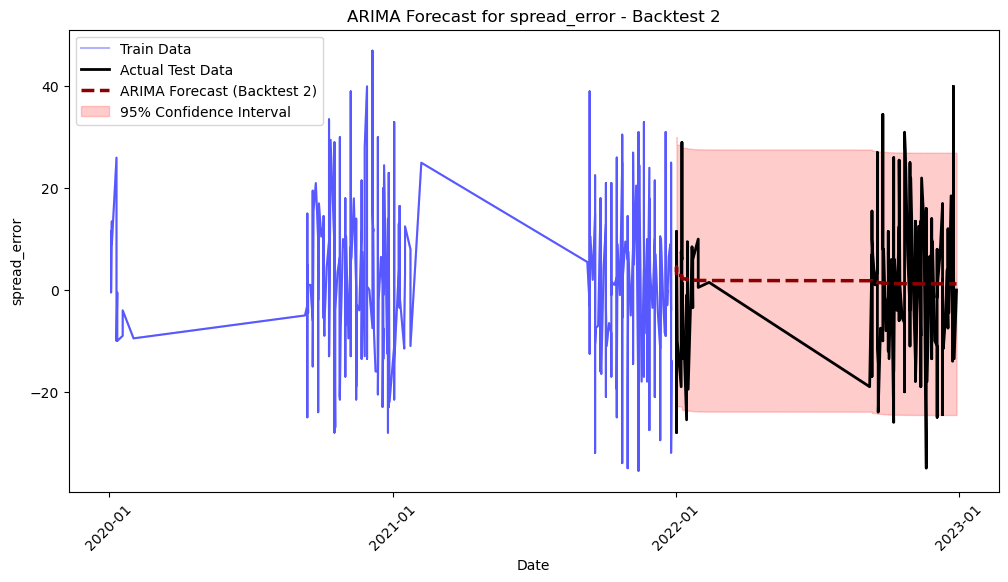


🔄 Backtest 3: Training on 2020-01-01 to 2022-12-31, Forecasting 2023-01-01 to 2023-12-31
Best ARIMA Order for Backtest 3: (2, 0, 2)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


🔹 RMSE: 13.2610, MAE: 10.0917


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


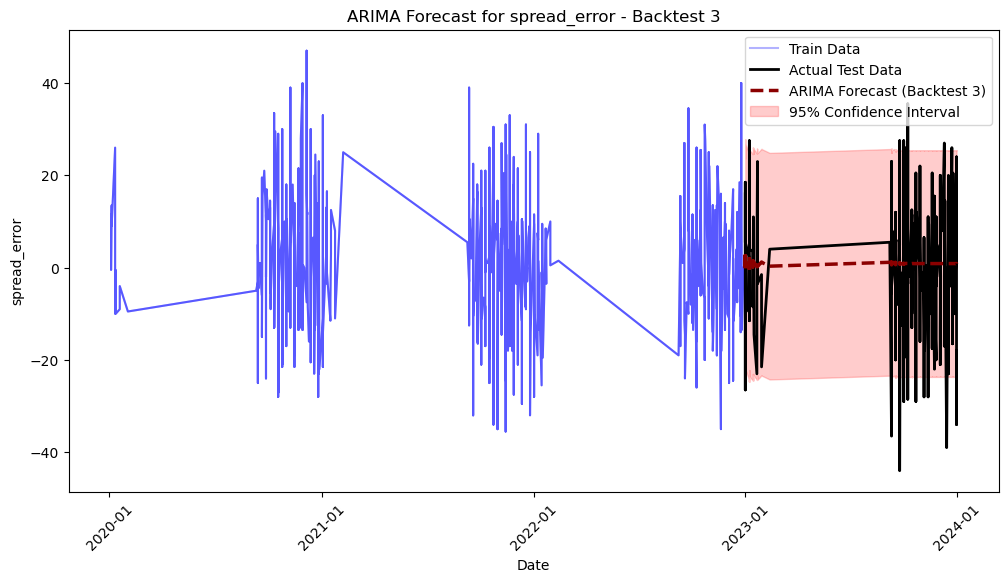


🔄 Backtest 4: Training on 2020-01-01 to 2023-12-31, Forecasting 2024-01-01 to 2024-12-31
Best ARIMA Order for Backtest 4: (2, 0, 2)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


🔹 RMSE: 12.7678, MAE: 9.7640


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


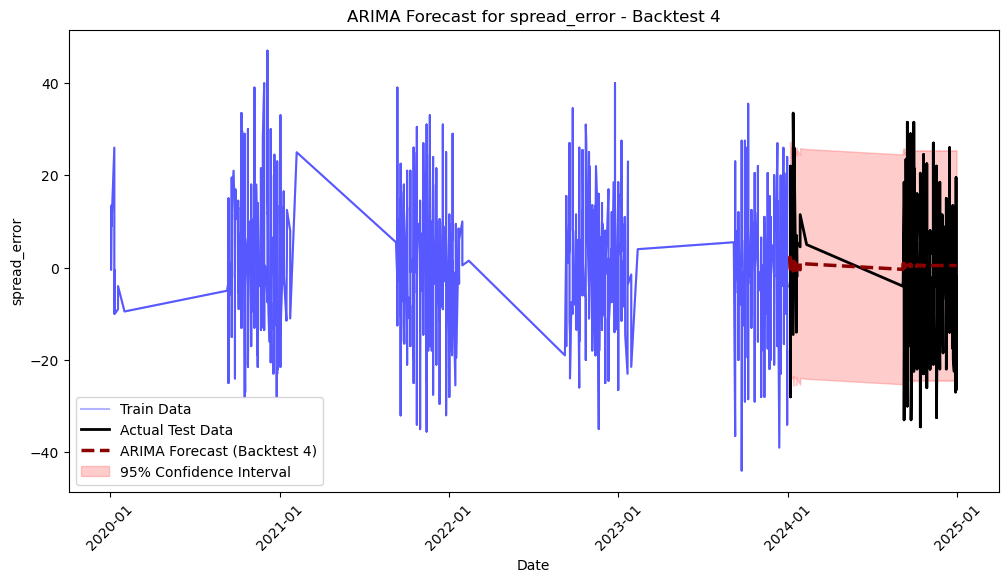


📊 Average RMSE for spread_error: 12.7827
📊 Average MAE for spread_error: 9.8110

🔄 Backtest 1: Training on 2020-01-01 to 2020-12-31, Forecasting 2021-01-01 to 2021-12-31
Best ARIMA Order for Backtest 1: (0, 0, 0)
🔹 RMSE: 13.6978, MAE: 11.0827


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

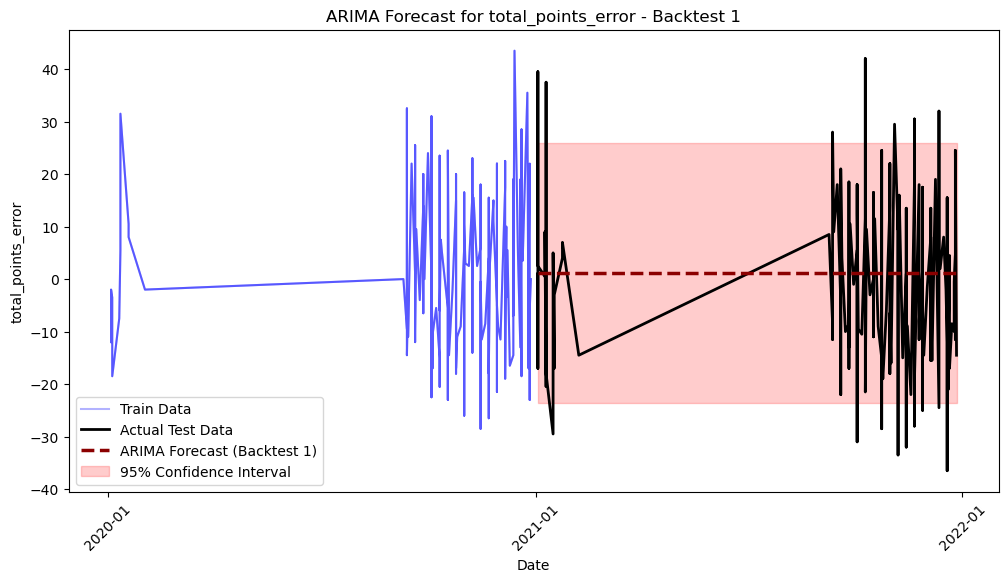


🔄 Backtest 2: Training on 2020-01-01 to 2021-12-31, Forecasting 2022-01-01 to 2022-12-31
Best ARIMA Order for Backtest 2: (5, 1, 0)
🔹 RMSE: 14.6266, MAE: 12.1239


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

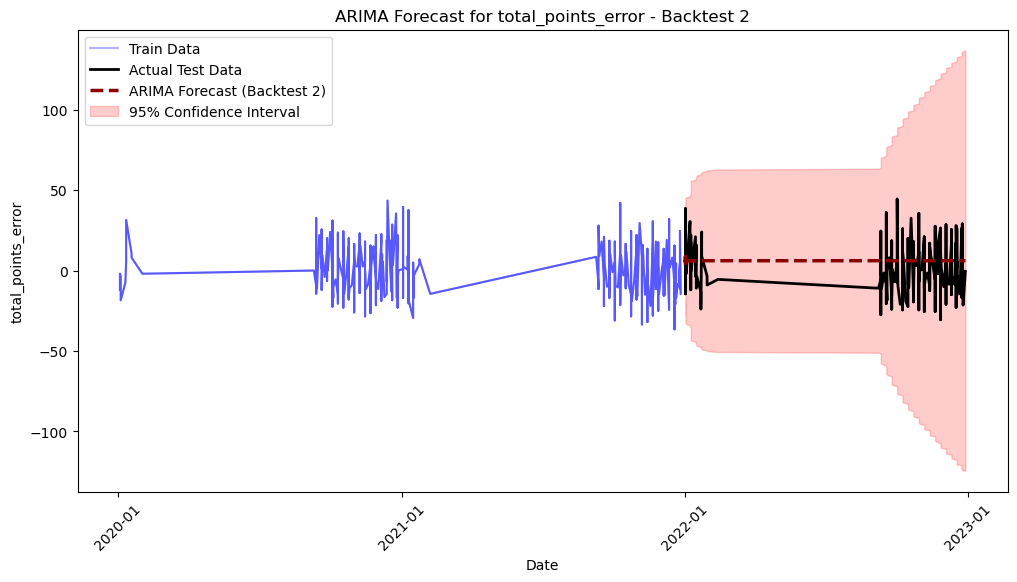


🔄 Backtest 3: Training on 2020-01-01 to 2022-12-31, Forecasting 2023-01-01 to 2023-12-31
Best ARIMA Order for Backtest 3: (0, 0, 0)
🔹 RMSE: 13.1428, MAE: 10.3242


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

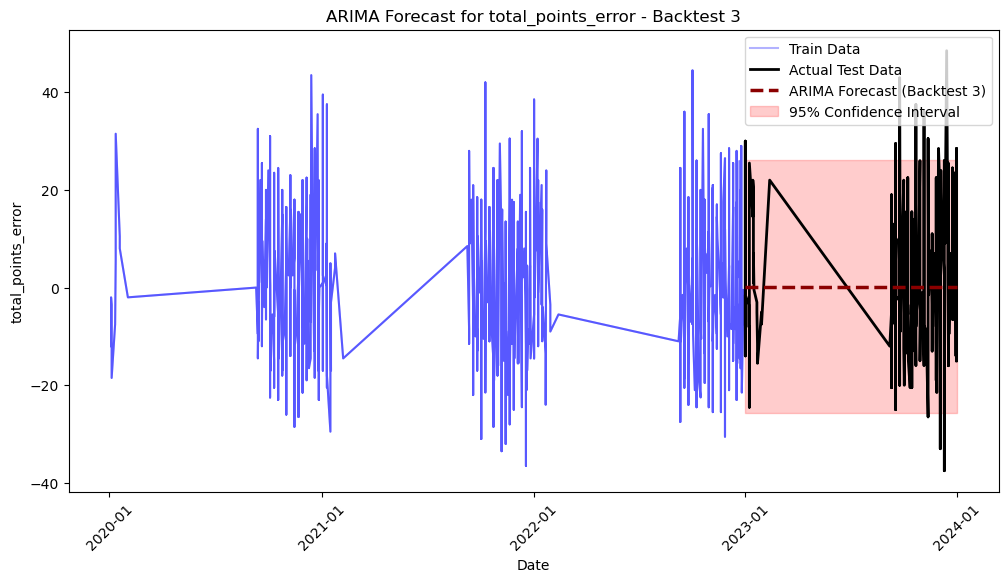


🔄 Backtest 4: Training on 2020-01-01 to 2023-12-31, Forecasting 2024-01-01 to 2024-12-31
Best ARIMA Order for Backtest 4: (0, 0, 0)
🔹 RMSE: 12.3950, MAE: 9.6867


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

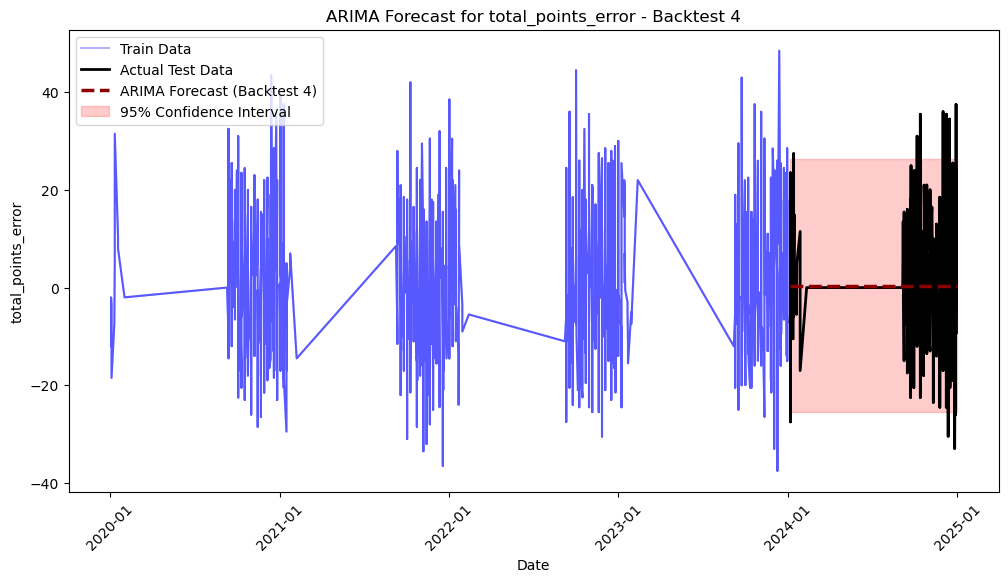


📊 Average RMSE for total_points_error: 13.4655
📊 Average MAE for total_points_error: 10.8044


In [45]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_arima_forecast(train, test, test_dates, forecast, conf_int, target, backtest_num):
    """
    Enhances ARIMA forecast visualization.
    """
    plt.figure(figsize=(12, 6))

    # Reduce opacity of train data for better visibility
    plt.plot(train["schedule_date"], train[target], label="Train Data", alpha=0.3, color="blue")

    # Highlight only the last 200 train points for clarity
    plt.plot(train["schedule_date"], train[target], alpha=0.5, color="blue")

    # Plot actual test data
    plt.plot(test_dates, test[target].iloc[:len(forecast)], label="Actual Test Data", color="black", linewidth=2)

    # Make forecast more visible
    plt.plot(test_dates, forecast, label=f"ARIMA Forecast (Backtest {backtest_num})",
             linestyle='dashed', color='darkred', linewidth=2.5)

    # Confidence Interval
    plt.fill_between(test_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label="95% Confidence Interval")

    # Formatting
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.title(f"ARIMA Forecast for {target} - Backtest {backtest_num}")
    plt.legend()

    # Improve x-axis readability
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show every year
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    plt.show()

def growing_window_arima(target, forecast_years=[2021, 2022, 2023, 2024], start_train_year=2020):
    """
    Runs ARIMA using a growing window of data for each forecast year.

    Parameters:
    - target: str, name of the target variable (e.g., "actual_spread").
    - forecast_years: list, years for which we are predicting values.
    - start_train_year: int, first year to include in training (keeps expanding).
    """
    # Ensure `schedule_date` is in datetime format
    nfl_data["schedule_date"] = pd.to_datetime(nfl_data["schedule_date"])

    # Drop missing values
    df = nfl_data.dropna(subset=[target]).copy()
    df = df.sort_values("schedule_date")  # Ensure chronological order

    # Store performance metrics
    rmse_scores, mae_scores = [], []

    for i, forecast_year in enumerate(forecast_years):
        # Define training & test periods
        train_start = f"{start_train_year}-01-01"  # Always start from the fixed year
        train_end = f"{forecast_year - 1}-12-31"  # Expand to the previous year
        test_start = f"{forecast_year}-01-01"
        test_end = f"{forecast_year}-12-31"

        # Filter data
        train = df[(df["schedule_date"] >= train_start) & (df["schedule_date"] <= train_end)]
        test = df[(df["schedule_date"] >= test_start) & (df["schedule_date"] <= test_end)]

        print(f"\n🔄 Backtest {i+1}: Training on {train_start} to {train_end}, Forecasting {test_start} to {test_end}")

        if len(train) == 0 or len(test) == 0:
            print(f"⚠️ Skipping backtest {i+1} due to insufficient data.")
            continue

        # Use auto_arima to find the best (p,d,q)
        auto_model = auto_arima(train[target], seasonal=False, trace=False, suppress_warnings=True)
        best_order = auto_model.order
        print(f"Best ARIMA Order for Backtest {i+1}: {best_order}")

        # Fit ARIMA model on training set
        model = ARIMA(train[target], order=best_order)
        fitted_model = model.fit()

        # Forecast future values
        forecast_object = fitted_model.get_forecast(steps=len(test))
        forecast = forecast_object.predicted_mean
        conf_int = forecast_object.conf_int()

        # Compute errors
        test_actual = test[target].iloc[:len(forecast)]
        rmse = np.sqrt(mean_squared_error(test_actual, forecast))
        mae = mean_absolute_error(test_actual, forecast)

        rmse_scores.append(rmse)
        mae_scores.append(mae)

        print(f"🔹 RMSE: {rmse:.4f}, MAE: {mae:.4f}")

        # Get test dates
        test_dates = test["schedule_date"].iloc[:len(forecast)]

        # Call improved plot function
        plot_arima_forecast(train, test, test_dates, forecast, conf_int, target, backtest_num=i+1)

    # Print overall performance
    print(f"\n📊 Average RMSE for {target}: {np.mean(rmse_scores):.4f}")
    print(f"📊 Average MAE for {target}: {np.mean(mae_scores):.4f}")

# Apply Growing ARIMA Backtesting for all 4 metrics
for target in ["actual_spread", "actual_total_points", "spread_error", "total_points_error"]:
    growing_window_arima(target, forecast_years=[2021, 2022, 2023, 2024], start_train_year=2020)


Accuracy for predicting underdog wins (no data leakage): 0.665


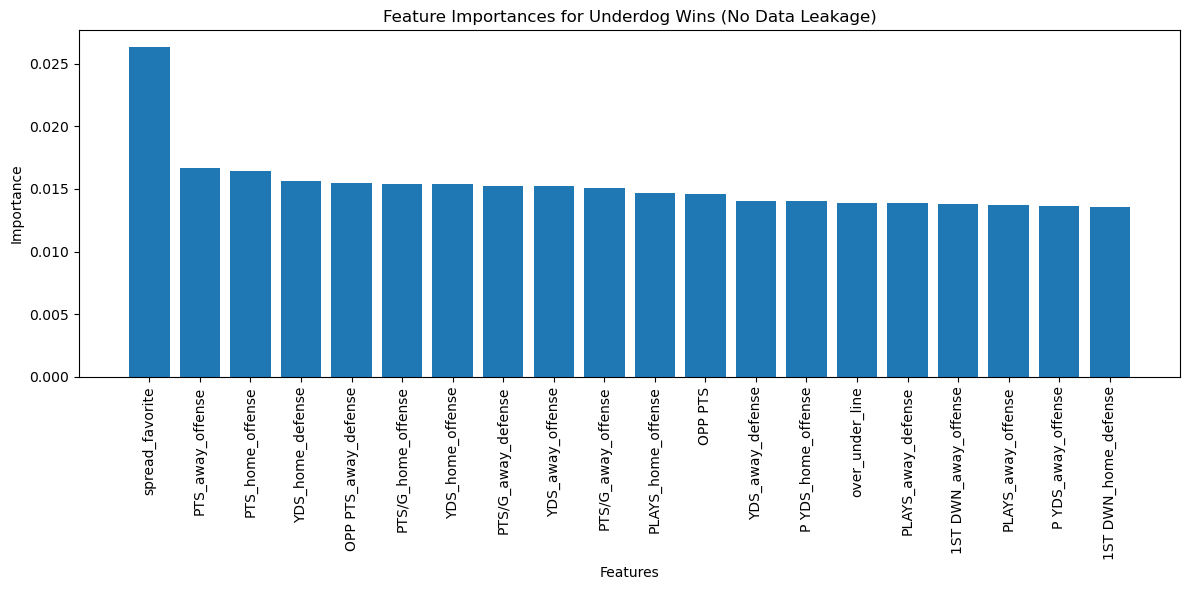

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Let's say 'nfl_data' is your DataFrame containing all columns.
# Our target is 'underdog_won'.

# Additional leaky columns to exclude
forecast_cols = [col for col in nfl_data.columns if (
    col.endswith("_single_exp") or
    col.endswith("_double_exp") or
    col.endswith("_triple_exp")
)]

# Combine them with the existing leaky columns
leaky_columns = [
    "actual_spread",
    "spread_error",
    "score_home",
    "score_away",
    "actual_total_points",
    "total_points_error",
    "over_hit",
    "underdog_won",
    "schedule_date"
] + forecast_cols

# 2. Build a feature set (X) by dropping these columns. Keep the target (y).
X = nfl_data.drop(columns=leaky_columns, errors='ignore')
y = nfl_data["underdog_won"]

# 3. Convert any categorical variables to numeric (via one-hot encoding).
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 5. Train a Random Forest classifier (you could use any classifier).
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 6. Evaluate accuracy on the test set.
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for predicting underdog wins (no data leakage): {accuracy:.3f}")

# 7. Plot feature importances.
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Decide how many top features you want to show
num_features_to_plot = 20  
top_indices = indices[:num_features_to_plot]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Underdog Wins (No Data Leakage)")
plt.bar(range(num_features_to_plot), importances[top_indices], align='center')
plt.xticks(range(num_features_to_plot), X_encoded.columns[top_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



Accuracy for predicting over hits (no data leakage): 0.546


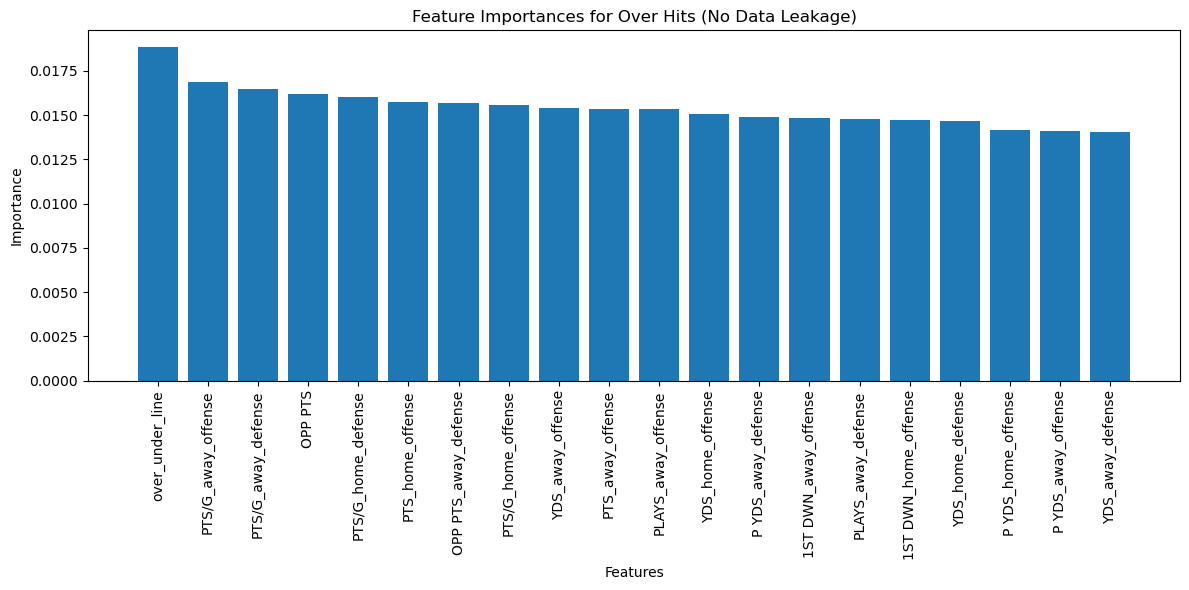

In [56]:
# 1. Define columns that leak outcome information for over_hit.
leaky_columns_overhit = [
    "score_home",           # Final home score
    "score_away",           # Final away score
    "actual_total_points",  # Derived from final scores
    "total_points_error",   # Derived from final scores
    "actual_spread",        # Also derived from final scores
    "spread_error",         # Also derived from final scores
    "underdog_won",         # Another target (not necessarily leaking for over_hit, but not needed)
    "over_hit",             # This is our target
    "schedule_date"         # Typically not used for predictive modeling
] + forecast_cols

# 2. Build a feature set (X) by dropping these columns. Keep the target (y).
X_overhit = nfl_data.drop(columns=leaky_columns_overhit, errors='ignore')
y_overhit = nfl_data["over_hit"]

# 3. Convert any categorical variables to numeric (via one-hot encoding).
X_overhit_encoded = pd.get_dummies(X_overhit, drop_first=True)

# 4. Split into training and testing sets.
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(
    X_overhit_encoded, 
    y_overhit, 
    test_size=0.3, 
    random_state=42
)

# 5. Train a Random Forest classifier (you could use any classifier).
rf_overhit = RandomForestClassifier(random_state=42)
rf_overhit.fit(X_train_oh, y_train_oh)

# 6. Evaluate accuracy on the test set.
y_pred_oh = rf_overhit.predict(X_test_oh)
accuracy_oh = accuracy_score(y_test_oh, y_pred_oh)
print(f"Accuracy for predicting over hits (no data leakage): {accuracy_oh:.3f}")

# 7. Plot feature importances.
importances_oh = rf_overhit.feature_importances_
indices_oh = np.argsort(importances_oh)[::-1]

num_features_to_plot = 20
top_indices_oh = indices_oh[:num_features_to_plot]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances for Over Hits (No Data Leakage)")
plt.bar(range(num_features_to_plot), importances_oh[top_indices_oh], align='center')
plt.xticks(range(num_features_to_plot), X_overhit_encoded.columns[top_indices_oh], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ---------------------------
# 1. Prepare the Data
# ---------------------------
# Define columns that leak post-game information.
leaky_columns = [
    "score_home",         # Final home score
    "score_away",         # Final away score
    "actual_spread",      # Derived from final scores
    "spread_error",       # Derived from final scores
    "actual_total_points",# Derived from final scores
    "total_points_error", # Derived from final scores
    "schedule_date"       # Not used as a predictive feature
] + forecast_cols

# Set the target variable (choose "underdog_won" or "over_hit")
target_variable = "underdog_won"
# If you want to predict over hits instead, change to: target_variable = "over_hit"

# Drop leaky columns and the target from the feature set.
X = nfl_data.drop(columns=leaky_columns + [target_variable], errors='ignore')
y = nfl_data[target_variable]

# One-hot encode categorical variables.
X = pd.get_dummies(X, drop_first=True)

# Combine features and target, then drop rows with any missing values.
data = pd.concat([X, y], axis=1)
data = data.dropna()  # Drop any row with missing values.

# Separate back into features and target.
X = data.drop(columns=[target_variable])
y = data[target_variable]

# ---------------------------
# 2. Split the Data
# ---------------------------
# Stratified split to maintain target proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------
# 3. Define Model Pipelines
# ---------------------------
# For models that benefit from scaling, include a scaler.
pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
    ])
}

# ---------------------------
# 4. Cross-Validation for Model Comparison
# ---------------------------
scoring = ["accuracy", "precision", "recall", "f1"]
cv_results = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, pipeline in pipelines.items():
    scores = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring)
    cv_results[name] = {metric: np.mean(scores[f"test_{metric}"]) for metric in scoring}

# Display the average CV metrics for each model.
print("Cross-Validation Results:")
for model_name, metrics_dict in cv_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics_dict.items():
        print(f"  {metric}: {value:.3f}")

# ---------------------------
# 5. Train on Training Data and Evaluate on Test Set
# ---------------------------
print("\nTest Set Evaluation:")
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))



Cross-Validation Results:

Logistic Regression:
  accuracy: 0.571
  precision: 0.362
  recall: 0.394
  f1: 0.377

Random Forest:
  accuracy: 0.657
  precision: 0.418
  recall: 0.100
  f1: 0.161

SVM:
  accuracy: 0.655
  precision: 0.371
  recall: 0.058
  f1: 0.100

XGBoost:
  accuracy: 0.636
  precision: 0.428
  recall: 0.290
  f1: 0.345

Test Set Evaluation:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      0.689     0.696     0.693       626
           1      0.373     0.365     0.369       310

    accuracy                          0.587       936
   macro avg      0.531     0.531     0.531       936
weighted avg      0.584     0.587     0.585       936


Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.682     0.935     0.788       626
           1      0.474     0.119     0.191       310

    accuracy                          0.665       936
   macro av

In [58]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE  # Imbalanced-learn package
from imblearn.pipeline import Pipeline as ImbPipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ---------------------------
# 1. Prepare the Data (drop leaky features, one-hot encode, drop missing rows)
# ---------------------------
leaky_columns = [
    "score_home", "score_away", "actual_spread", "spread_error",
    "actual_total_points", "total_points_error", "schedule_date"
] + forecast_cols

# Choose target: "underdog_won"
target_variable = "underdog_won"

X = nfl_data.drop(columns=leaky_columns + [target_variable], errors='ignore')
y = nfl_data[target_variable]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Save the list of training features (this is what the model sees)
training_features = X.columns.tolist()
print("Training features:")
print(training_features)

# Combine X and y then drop rows with missing values
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[target_variable])
y = data[target_variable]

# ---------------------------
# 2. Split the Data
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------
# 3. Define Pipelines with SMOTE and Class Weights
# ---------------------------
pipelines = {
    "Logistic Regression": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    "SVM": ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SVC(class_weight='balanced', probability=True, random_state=42))
    ]),
    "XGBoost": ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric="logloss", 
                                scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
                                random_state=42))
    ])
}

# ---------------------------
# 4. Cross-Validation with Updated Pipelines
# ---------------------------
scoring = ["accuracy", "precision", "recall", "f1"]
cv_results = {}
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, pipeline in pipelines.items():
    scores = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring)
    cv_results[name] = {metric: np.mean(scores[f"test_{metric}"]) for metric in scoring}

print("Cross-Validation Results with SMOTE and Class Weights:")
for model_name, metrics_dict in cv_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics_dict.items():
        print(f"  {metric}: {value:.3f}")

# ---------------------------
# 5. Train on Training Data and Evaluate on Test Set
# ---------------------------
print("\nTest Set Evaluation with SMOTE and Class Weights:")
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    
# (Assuming XGBoost performed best, you can later save or directly use the XGBoost pipeline)
model_underdog = pipelines["XGBoost"]


Training features:
['schedule_season', 'schedule_playoff', 'spread_favorite', 'over_under_line', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'over_hit', 'RK_home_offense', 'PTS/G_home_offense', 'PTS_home_offense', 'PLAYS_home_offense', 'YDS_home_offense', 'YDS/PLAY_home_offense', '1ST DWN_home_offense', 'PENALTY_home_offense', 'P YDS_home_offense', '+/- TOV_home_offense', 'RK_away_offense', 'PTS/G_away_offense', 'PTS_away_offense', 'PLAYS_away_offense', 'YDS_away_offense', 'YDS/PLAY_away_offense', '1ST DWN_away_offense', 'PENALTY_away_offense', 'P YDS_away_offense', '+/- TOV_away_offense', 'RK_home_defense', 'PTS/G_home_defense', 'OPP PTS', 'PLAYS_home_defense', 'YDS_home_defense', 'YDS/PLAY_home_defense', '1ST DWN_home_defense', 'PENALTY_home_defense', 'P YDS_home_defense', '+/- TOV_home_defense', 'RK_away_defense', 'PTS/G_away_defense', 'OPP PTS_away_defense', 'PLAYS_away_defense', 'YDS_away_defense', 'YDS/PLAY_away_defense', '1ST DWN_away_defens

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Load data
df = pd.read_csv("nfl_data_with_team_stats.csv")

# Drop columns that would be known post-game
drop_cols = [
    "score_home", "score_away", "spread_error", "total_points_error",
    "underdog_won", "over_hit"
]
df.drop(columns=drop_cols, inplace=True)

# Drop rows with missing weather data
weather_cols = ["weather_temperature", "weather_wind_mph", "weather_humidity"]
df.dropna(subset=weather_cols, inplace=True)

# Convert Time of Possession (TOP) from MM:SS:00 or MM:SS to total seconds
def convert_time_to_seconds(time_str):
    if isinstance(time_str, str) and ":" in time_str:
        time_str = time_str.rstrip(":00")  # Remove ":00" if present
        parts = time_str.split(":")
        if len(parts) == 2:  # MM:SS format
            m, s = map(int, parts)
            return m * 60 + s
        elif len(parts) == 3:  # HH:MM:SS format
            h, m, s = map(int, parts)
            return h * 3600 + m * 60 + s
    return np.nan  # Return NaN if invalid

top_cols = ["TOP_home_offense", "TOP_away_offense", "TOP_home_defense", "TOP_away_defense"]
for col in top_cols:
    df[col] = df[col].apply(convert_time_to_seconds)

# Combine both home and away teams to ensure all teams are included
all_teams = pd.concat([df["team_home"], df["team_away"]]).unique()

# Fit the LabelEncoder on all unique teams
team_encoder = LabelEncoder()
team_encoder.fit(all_teams)

# Transform both home and away teams
df["team_home"] = team_encoder.transform(df["team_home"])
df["team_away"] = team_encoder.transform(df["team_away"])

# Save mapping for decoding later
team_mapping = dict(zip(team_encoder.classes_, team_encoder.transform(team_encoder.classes_)))

# Convert schedule_date to datetime features
df["schedule_date"] = pd.to_datetime(df["schedule_date"])
df["schedule_month"] = df["schedule_date"].dt.month
df["schedule_day"] = df["schedule_date"].dt.day
df.drop(columns=["schedule_date"], inplace=True)

# Convert categorical features to numeric
categorical_cols = ["schedule_week", "team_favorite_id", "stadium", "weather_detail", "team_home_id", "team_away_id"]
for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes

# Define targets
target_spread = "actual_spread"
target_total_points = "actual_total_points"

# Prepare feature matrix and targets
X = df.drop(columns=[target_spread, target_total_points])
y_spread = df[target_spread]
y_total_points = df[target_total_points]

# Train/test split
X_train, X_test, y_train_spread, y_test_spread = train_test_split(X, y_spread, test_size=0.2, random_state=42)
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total_points, test_size=0.2, random_state=42)

# Train XGBoost models
spread_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.05, max_depth=6, enable_categorical=True)
spread_model.fit(X_train, y_train_spread)

total_points_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.05, max_depth=6, enable_categorical=True)
total_points_model.fit(X_train, y_train_total)

# Save the trained models
spread_model.save_model("spread_model.json")
total_points_model.save_model("total_points_model.json")

# Get original team names (not encoded)
teams = sorted(team_mapping.keys())

# Create Dropdown Widgets for Team Selection
team_home_dropdown = widgets.Dropdown(
    options=teams,
    description="Home Team:",
    style={'description_width': 'initial'}
)

team_away_dropdown = widgets.Dropdown(
    options=teams,
    description="Away Team:",
    style={'description_width': 'initial'}
)

favored_team_dropdown = widgets.Dropdown(
    options=teams,
    description="Favored Team:",
    style={'description_width': 'initial'}
)

# Create Input Boxes for Predicted Spread and Over/Under
predicted_spread_input = widgets.FloatText(
    value=0.0,
    description="Sportsbook Spread:",
    style={'description_width': 'initial'}
)

predicted_ou_input = widgets.FloatText(
    value=45.0,
    description="Sportsbook Over/Under:",
    style={'description_width': 'initial'}
)

# Display Inputs
display(team_home_dropdown, team_away_dropdown, favored_team_dropdown, predicted_spread_input, predicted_ou_input)

# Button to Trigger Prediction
predict_button = widgets.Button(description="Predict Outcomes")
display(predict_button)

def calculate_probability(error, scale=5):
    return 1 / (1 + np.exp(error / scale))

def make_predictions(b):
    team_home = team_home_dropdown.value
    team_away = team_away_dropdown.value
    favored_team = favored_team_dropdown.value
    predicted_spread = predicted_spread_input.value
    predicted_ou = predicted_ou_input.value

    underdog_team = team_home if favored_team == team_away else team_away

    team_home_encoded = team_mapping[team_home]
    team_away_encoded = team_mapping[team_away]

    game_data = df[(df["team_home"] == team_home_encoded) & (df["team_away"] == team_away_encoded)].iloc[-1:]

    if game_data.empty:
        print("\n❌ No historical matchups found between these teams.")
    else:
        X_input = game_data.drop(columns=[target_spread, target_total_points], errors="ignore")
        spread_model.load_model("spread_model.json")
        total_points_model.load_model("total_points_model.json")
        predicted_actual_spread = spread_model.predict(X_input)[0]
        predicted_actual_total_points = total_points_model.predict(X_input)[0]
        
        spread_error = predicted_actual_spread - predicted_spread
        ou_error = predicted_actual_total_points - predicted_ou
        spread_prob = calculate_probability(spread_error)
        ou_prob = calculate_probability(ou_error)
        
        if predicted_actual_spread < 0:
            print(f"🏈 The model predicts that the {favored_team} will win by {abs(predicted_actual_spread):.2f} points. (Prob: {spread_prob:.2%})")
            print("✅ Recommended Bet: Bet on the favored team to cover the spread." if abs(predicted_actual_spread) > abs(predicted_spread) else "✅ Recommended Bet: Favored team wins, but does not cover the spread.")
        else:
            print(f"🏈 The model predicts that the {underdog_team} will win by {predicted_actual_spread:.2f} points. (Prob: {spread_prob:.2%})")
            print("✅ Recommended Bet: Bet on the underdog to win outright.")
        print(f"🏈 Predicted Total Points: {predicted_actual_total_points:.2f} (Prob: {ou_prob:.2%})")
        print("✅ Recommended Bet: Bet on the over." if predicted_actual_total_points > predicted_ou else "✅ Recommended Bet: Bet on the under.")

# Ensure button is connected to function
predict_button.on_click(make_predictions)


Dropdown(description='Home Team:', options=('Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffa…

Dropdown(description='Away Team:', options=('Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffa…

Dropdown(description='Favored Team:', options=('Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Bu…

FloatText(value=0.0, description='Sportsbook Spread:', style=DescriptionStyle(description_width='initial'))

FloatText(value=45.0, description='Sportsbook Over/Under:', style=DescriptionStyle(description_width='initial'…

Button(description='Predict Outcomes', style=ButtonStyle())

🏈 The model predicts that the Dallas Cowboys will win by 14.65 points. (Prob: 86.17%)
✅ Recommended Bet: Bet on the favored team to cover the spread.
🏈 Predicted Total Points: 49.91 (Prob: 47.96%)
✅ Recommended Bet: Bet on the over.
